# Test of the LASTENSequence
The generator for the LASTEN data set is tested here.

# Import statements
Following packages are necessary:

In [2]:
import random
from endolas import utils
from endolas import LASTENSequence
import importlib

import numpy as np

from endolas import UNet
from endolas import preprocess_input as pre_une

from matplotlib import pyplot as plt

# Settings
Set the plot settings

In [3]:
plt.rcParams['figure.figsize'] = (15, 15)

# Data
Import training images

In [4]:
path_fixed = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/fix'
path_train = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/train'
path_validation = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/validation'
path_test = r'/home/julian/Documents/Studium/MT-Masterarbeit/Data/LASTEN/test'

# Data Preparation
The generator sequence for training is built.

In [5]:
width = 384
height = 384
grid_width = 18
grid_height = 18


#path = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/Prediction/KK17_gap0_Cam_16904_Cine2_0.png"
path = "/home/julian/Documents/Studium/MT-Masterarbeit/Data/Prediction/KK17_gap0_Cam_16904_Cine2_0_19.avi"


train_gen = LASTENSequence(path,
                           path_fixed,
                           batch_size=2,
                           image_ids=None,
                           preprocess_input=pre_une,
                           #shuffle=True,
                           augment=True,
                           width=width,
                           height=height,
                           label="predict",
                           channel="moving+fixed",
                           input="vid",
                           upper_frame=2)

In [49]:
batch_index = 1

X, y = train_gen[batch_index]

image = X[0]
#mask = y[batch_index]
#keypoints = y[batch_index]

In [50]:
X.shape

(1, 384, 384, 2)

NameError: name 'mask' is not defined

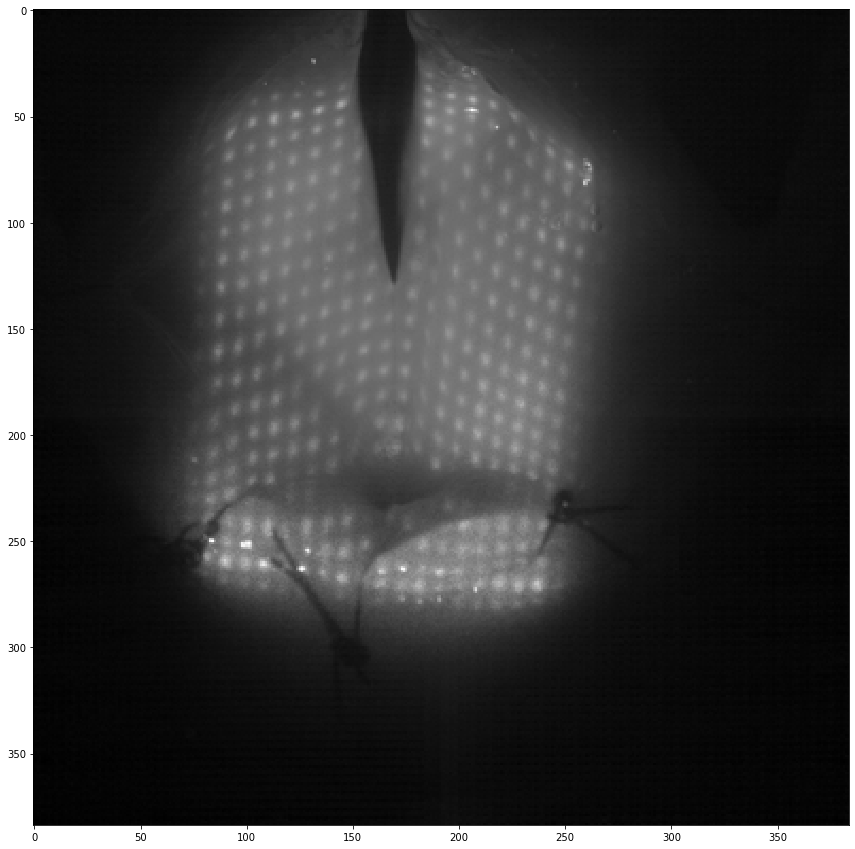

In [51]:
plt.clf()
plt.imshow(image[:,:,0], cmap="gray")
plt.imshow(mask[:,:,0], cmap="gray")

x_list = []
y_list = []

for index in range(0, len(keypoints)):   
    x = keypoints[index][0][0]
    y = keypoints[index][1][0]
    
    x_list.append(x)
    y_list.append(y)
    
plt.scatter(x_list, y_list, s=80, facecolors='none', edgecolors='r')